In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Carga del dataset
df = pd.read_csv('demanda-histrica.csv')    # Sin pasar parametro "head=" las columnas vienen indexadas por su nombre propio!

# Resumen de los valores únicos que puede tomar cada columna
print(df.nunique())

anio                       9
mes                       12
agente_nemo              591
agente_descripcion       610
tipo_agente                4
region                     9
provincia                 22
categoria_area            11
categoria_demanda          2
tarifa                    37
categoria_tarifa           4
demanda_MWh           104400
indice_tiempo             98
dtype: int64


In [3]:
df.head()

,anio,mes,agente_nemo,agente_descripcion,tipo_agente,region,provincia,categoria_area,categoria_demanda,tarifa,categoria_tarifa,demanda_MWh,indice_tiempo
0,2012,1,AARGTAOY,AEROP ARG 2000 - Aeroparque,GU,GRAN BS.AS.,BUENOS AIRES,Gran Usuario MEM,Gran Usuario,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,2222.628,2012-01
1,2012,1,ACARQQ3Y,ASOC.COOP.ARG. - Quequén,GU,BUENOS AIRES,BUENOS AIRES,Gran Usuario MEM,Gran Usuario,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,536.858,2012-01
2,2012,1,ACARSLSY,ASOC.COOP.ARG. - San Lorenzo,GU,LITORAL,SANTA FE,Gran Usuario MEM,Gran Usuario,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,336.297,2012-01
3,2012,1,ACINROSY,ACINDAR ROSARIO EX-NAVARRO,GU,LITORAL,SANTA FE,Gran Usuario MEM,Gran Usuario,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,601.066,2012-01
4,2012,1,ACINTBOY,ACINDAR PTA. TABLADA,GU,GRAN BS.AS.,BUENOS AIRES,Gran Usuario MEM,Gran Usuario,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,3076.618,2012-01


In [4]:
df.shape

(122263, 13)

In [5]:
df1 = df[['tipo_agente','region','demanda_MWh', 'indice_tiempo']]   # estaban indexadas por nros las columnas, no por los strings
df1.head(10)

,tipo_agente,region,demanda_MWh,indice_tiempo
0,GU,GRAN BS.AS.,2222.628,2012-01
1,GU,BUENOS AIRES,536.858,2012-01
2,GU,LITORAL,336.297,2012-01
3,GU,LITORAL,601.066,2012-01
4,GU,GRAN BS.AS.,3076.618,2012-01
5,GU,LITORAL,68179.459,2012-01
6,GU,CUYO,703.186,2012-01
7,GU,GRAN BS.AS.,5584.473,2012-01
8,GU,GRAN BS.AS.,1218.180,2012-01
9,GU,GRAN BS.AS.,631.637,2012-01


In [6]:
df1.columns  

Index(['tipo_agente', 'region', 'demanda_MWh', 'indice_tiempo'], dtype='object')

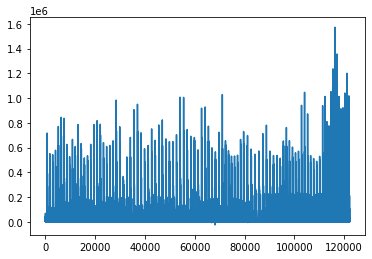

In [7]:
plt.plot(df1['demanda_MWh'])

In [8]:
df1.drop(df1.loc[df1['tipo_agente']!='GU'].index, inplace=True)   # Queremos quitar los valores de tipo_agente que no vamos a usar para la prediccion

C:\Users\JUAN\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [9]:
df1['region']  # tenemos que dropear todavia otras 8 regiones para trabajar con 1 sola...

0          GRAN BS.AS.
1         BUENOS AIRES
2              LITORAL
3              LITORAL
4          GRAN BS.AS.
              ...     
122257         COMAHUE
122258     GRAN BS.AS.
122259      PATAGONICA
122261            CUYO
122262     GRAN BS.AS.
Name: region, Length: 40317, dtype: object

In [10]:
df1.drop(df1.loc[df1['region']!='BUENOS AIRES'].index, inplace=True) 

In [11]:
df1  # Ahora lo que sucede es que se repiten valores para GU y Region, WTF?

,tipo_agente,region,demanda_MWh,indice_tiempo
1,GU,BUENOS AIRES,536.858,2012-01
12,GU,BUENOS AIRES,3947.187,2012-01
16,GU,BUENOS AIRES,2011.403,2012-01
31,GU,BUENOS AIRES,2703.511,2012-01
53,GU,BUENOS AIRES,2283.633,2012-01
...,...,...,...,...
122220,GU,BUENOS AIRES,471.208,2020-02
122233,GU,BUENOS AIRES,758.932,2020-02
122234,GU,BUENOS AIRES,827.217,2020-02
122235,GU,BUENOS AIRES,1400.088,2020-02


In [12]:
### df2 = df1.groupby(df1.index)['demanda_MWh'].sum().reset_index() ASI NO

In [13]:
df1 = df1.groupby('indice_tiempo')['demanda_MWh'].sum().reset_index()  # Agregamos los valores para los índices que se repiten

In [14]:
df1.head()

,indice_tiempo,demanda_MWh
0,2012-01,314345.008
1,2012-02,293941.443
2,2012-03,334085.729
3,2012-04,320688.069
4,2012-05,314725.504


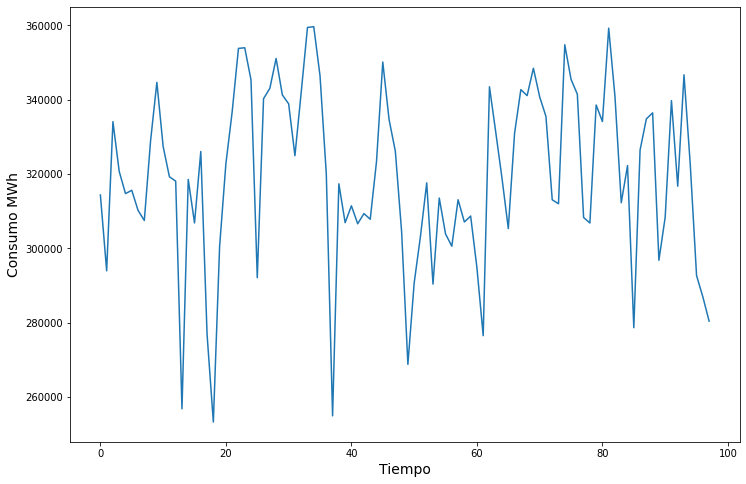

In [15]:
fig = plt.figure(figsize=(12,8))
plt.xlabel('Tiempo', fontsize=14)
plt.ylabel('Consumo MWh', fontsize=14)
plt.plot(df1['demanda_MWh'])

In [16]:
print(df1.index)  # Todavía tenemos que corregir el índice, está en formato "RangeIndex"

RangeIndex(start=0, stop=98, step=1)


In [17]:
df1.index = pd.to_datetime(df1['indice_tiempo'], format='%Y%m%')  # Primero lo pasamos a DateTime

In [18]:
df1.index

DatetimeIndex(['2012-01-01', '2012-02-01', '2012-03-01', '2012-04-01',
               '2012-05-01', '2012-06-01', '2012-07-01', '2012-08-01',
               '2012-09-01', '2012-10-01', '2012-11-01', '2012-12-01',
               '2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01',
               '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01',
               '2013-09-01', '2013-10-01', '2013-11-01', '2013-12-01',
               '2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
               '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
      

In [19]:
df1.index.to_period("M")   # Luego, de DateTime a Period

PeriodIndex(['2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06',
             '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12',
             '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06',
             '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12',
             '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06',
             '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12',
             '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
             '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
             '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12',
             '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
             '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
             '2018-01', '2018-02', '2018-03', '2018-

In [20]:
from statsmodels.tsa.arima.model import ARIMA

In [21]:
# Fit del modelo:
model = ARIMA(df1['demanda_MWh'], order=(5,1,0))
model_fit = model.fit()

# Resumen del Ajuste (fit) del modelo
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            demanda_MWh   No. Observations:                   98
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1115.694
Date:                Sun, 13 Jun 2021   AIC                           2243.388
Time:                        23:10:00   BIC                           2258.836
Sample:                    01-01-2012   HQIC                          2249.634
                         - 02-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1577      0.050     -3.184      0.001      -0.255      -0.061
ar.L2         -0.0034      0.053     -0.064      0.949      -0.106       0.100
ar.L3         -0.1325      0.049     -2.712      0.0

C:\Users\JUAN\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\JUAN\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\JUAN\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


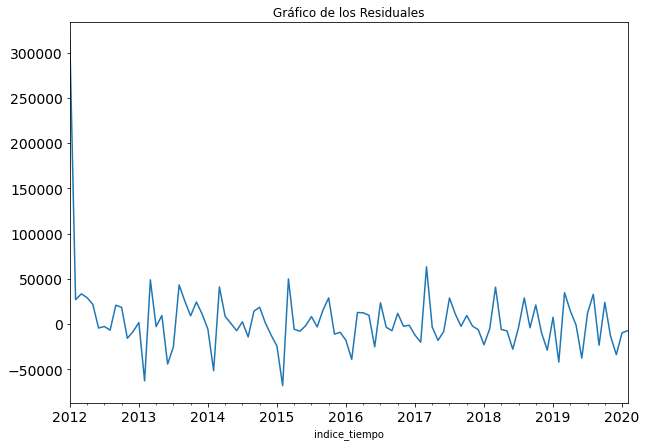

In [22]:
# Gráfico de los Residuales
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(figsize=(10,7),fontsize=14, legend=None)
plt.title('Gráfico de los Residuales')
plt.show()

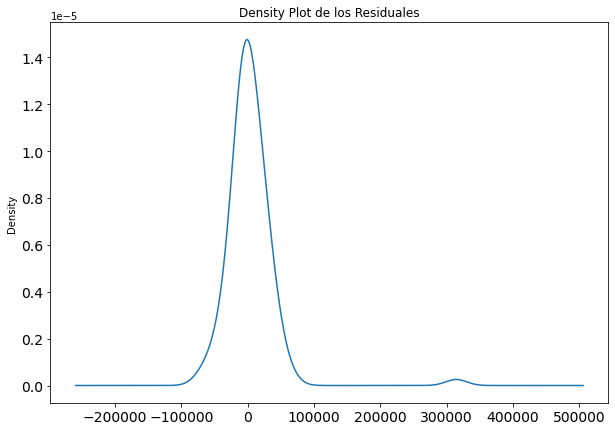

Estadística Descriptiva de los Residuales: 
                    0
count      98.000000
mean     3933.412352
std     39590.047467
min    -67921.898848
25%     -9606.115659
50%     -2383.602218
75%     15207.273749
max    314345.008000


In [23]:
# Gráfico de Densidad de los Residuales
residuals.plot(kind='kde', figsize=(10,7), fontsize=14, legend=None)
plt.title('Density Plot de los Residuales')
plt.show()
# Summary stats de los residuals
print('Estadística Descriptiva de los Residuales: \n', residuals.describe())

In [24]:
# División del dataset entre training y test
X = df1['demanda_MWh']
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

In [25]:
# Validación Walk-Forward 
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('Predicted=%f, Expected=%f' % (yhat, obs))

Predicted=338613.274520, Expected=318816.832000
Predicted=314695.514747, Expected=305314.387000
Predicted=302653.133037, Expected=330970.867000
Predicted=329927.249770, Expected=342707.866000
Predicted=343959.036635, Expected=341093.330000
Predicted=339608.417788, Expected=348462.871000
Predicted=344502.973995, Expected=340762.018000
Predicted=341756.404631, Expected=335488.979000
Predicted=335436.825118, Expected=313051.819000
Predicted=316015.015500, Expected=311989.861000
Predicted=312563.974813, Expected=354788.096000
Predicted=351933.334244, Expected=345467.312000
Predicted=349136.845816, Expected=341478.171000
Predicted=337054.830654, Expected=308299.985000
Predicted=310737.925026, Expected=306808.471000
Predicted=308136.534248, Expected=338566.771000
Predicted=338345.269236, Expected=334118.127000
Predicted=337466.561641, Expected=359252.775000
Predicted=351437.676438, Expected=340826.643000
Predicted=341886.610859, Expected=312271.248000
Predicted=313900.027930, Expected=322265

In [26]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [27]:
# Evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test Root Mean Squared Error: %.3f' % rmse)

Test Root Mean Squared Error: 21688.928


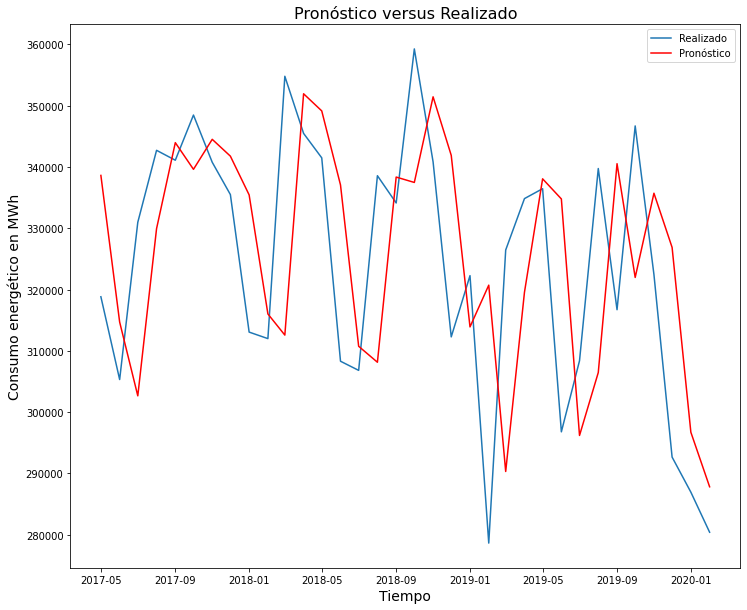

In [28]:
# Plot forecasts against actual outcomes
fig = plt.figure(figsize=(12,10))
plt.plot(test, label='Realizado')
plt.plot(test.index,predictions, color='red', label='Pronóstico')
plt.ylabel('Consumo energético en MWh',fontsize=14)
plt.xlabel('Tiempo',fontsize=14)
plt.title('Pronóstico versus Realizado', fontsize=16)
plt.legend()
plt.show()